<a href="https://colab.research.google.com/github/QiyuLiu21/L04/blob/master/911EmergencyCalls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [61]:
data = pd.read_csv('/content/drive/MyDrive/911.csv')

In [62]:
data.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [64]:
data.head(-10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99477,40.095652,-75.244877,FOX HOUND DR & MARBLE HL; WHITEMARSH; Station...,19444.0,EMS: SUBJECT IN PAIN,2016-08-24 10:47:00,WHITEMARSH,FOX HOUND DR & MARBLE HL,1
99478,40.100344,-75.293955,CHEMICAL RD & GALLAGHER RD; PLYMOUTH; 2016-08-...,19462.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 10:47:02,PLYMOUTH,CHEMICAL RD & GALLAGHER RD,1
99479,40.221227,-75.288737,SUMNEYTOWN PIKE & RR OVERPASS; UPPER GWYNEDD;...,NaN,EMS: CARDIAC EMERGENCY,2016-08-24 10:52:01,UPPER GWYNEDD,SUMNEYTOWN PIKE & RR OVERPASS,1
99480,40.221227,-75.288737,SUMNEYTOWN PIKE & RR OVERPASS; UPPER GWYNEDD;...,NaN,EMS: DIABETIC EMERGENCY,2016-08-24 10:52:01,UPPER GWYNEDD,SUMNEYTOWN PIKE & RR OVERPASS,1


# How many calls in at the same time?

In [65]:
data['timeStamp'].value_counts().head()

2015-12-10 17:40:01    8
2016-04-21 17:57:01    7
2015-12-23 14:12:01    7
2016-03-21 09:02:00    6
2016-02-14 14:02:01    6
Name: timeStamp, dtype: int64

# What is the top 5 zip code?

In [66]:
data['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [67]:
data['Reason'] = data['title'].apply(lambda title: title.split(':')[0])

# What is the most common Reason for a 911 call based off of this new column?

In [68]:
data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

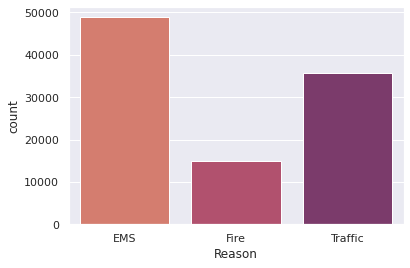

In [69]:
sns.countplot(x='Reason',data=data,palette='flare')

In [70]:
type(data['timeStamp'].iloc[0])

str

In [71]:
data['timeStamp']=pd.to_datetime(data['timeStamp'])
time = data['timeStamp'].iloc[0]
time.hour

17

In [72]:
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Day of week'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [73]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [74]:
data['Day of week']=data['Day of week'].map(dmap)

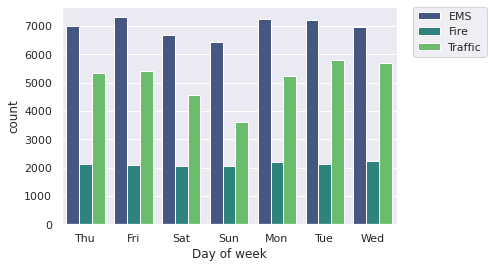

In [75]:
sns.countplot(x='Day of week',data=data,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

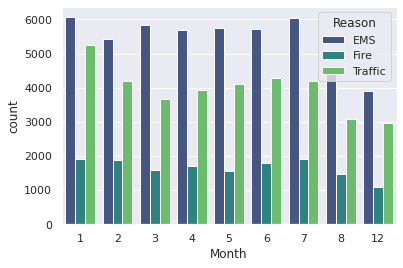

In [59]:
sns.countplot(x='Month',data=data,hue='Reason',palette='viridis')

In [10]:
zip_code = int(input("Enter zip code: "))
address= data[data['zip']==zip_code]['addr']
print(address)

Enter zip code: 19401
2                       HAWS AVE
3             AIRY ST & SWEDE ST
18             PENN ST & ARCH ST
20             PENN ST & ARCH ST
32        PINE ST & W ROBERTS ST
                  ...           
99465         AIRY ST & GREEN ST
99469      MARKLEY ST & JAMES ST
99472     PINE ST & W ROBERTS ST
99487    MARKLEY ST & W LOGAN ST
99489    CHESTNUT ST & WALNUT ST
Name: addr, Length: 6979, dtype: object


In [11]:
data['title'].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64